In [15]:
%matplotlib inline

import pandas as pd
from os import listdir
from os.path import join
from itertools import combinations

from typing import List

# Compute jaccard similarity between each country's top 1000 most-visited sites and the global top list


In [16]:
readings = listdir('data/data/country')

In [17]:
ex = readings[0]
print(ex)
df = pd.read_csv(join('data/data/country', ex))

202108.csv.gz


In [18]:
# All of the country readings we have should have a corresponding global reading.
assert(
    set(listdir('data/data/country')).issubset(listdir('data/data/global'))
)

In [19]:
def originset (reading_df, country_code=None, max_rank=None):
    my_subset = reading_df.copy()
    if country_code:
        my_subset = my_subset[my_subset['country_code']==country_code]
    if max_rank:
        my_subset = my_subset[my_subset['rank'] <= max_rank]
    return set(my_subset['origin'].tolist())

In [20]:
def jaccard_similarity(set1: set, set2: set):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

jaccard_similarity(
    originset(df, 'us'),
    originset(df, 'ca'),
)

0.2507817385866166

In [21]:
global_top = pd.read_csv(join('data/data/global', ex))

In [22]:
jaccard_similarity(
    originset(df, 'fj'),
    originset(global_top)
)

0.12994350282485875

In [23]:
# def average_jaccard_similarity (sets: List[set]):
#     similarities = []
#     for a, b in combinations(sets, 2):
#         similarity = jaccard_similarity(a, b)
#         similarities.append(similarity)
#     return sum(similarities) / len(similarities)

# def metric (reading_df):
#     origin_sets = []
#     for country_code in reading_df['country_code'].unique():
#         origin_sets.append(originset(reading_df, country_code))

#     return 1-average_jaccard_similarity(origin_sets)

# metric(df)

In [27]:
rows = []
for i, reading in enumerate(readings):
    datestr = reading.split('.')[0]
    print(f'{datestr} ({i}/{len(readings)-1})')
    country_top = pd.read_csv(join('data/data/country', reading))
    global_top = pd.read_csv(join('data/data/global', reading))
    country_codes = country_top['country_code'].unique()
    metrics = []
    for country_code in country_codes:
        jsim = jaccard_similarity(
            originset(country_top, country_code, max_rank=1000),
            originset(global_top, max_rank=1000)
        )
        jsim = jsim
        rows.append(
            [datestr, country_code, jsim]
        )

202108 (0/23)
202211 (1/23)
202301 (2/23)
202204 (3/23)
202111 (4/23)
202212 (5/23)
202208 (6/23)
202203 (7/23)
202201 (8/23)
202112 (9/23)
202106 (10/23)
202104 (11/23)
202109 (12/23)
202107 (13/23)
202210 (14/23)
202202 (15/23)
202302 (16/23)
202209 (17/23)
202110 (18/23)
202105 (19/23)
202207 (20/23)
202205 (21/23)
202206 (22/23)


In [30]:
content_locality = pd.DataFrame(rows)
content_locality = content_locality.rename(columns={
    0: "date", 
    1: "country_code",
    2: "jaccard_similarity",
})
content_locality['date'] = pd.to_datetime(content_locality['date'], format='%Y%m')#, errors='coerce').dropna()
content_locality = content_locality.set_index('date')
content_locality

,country_code,jaccard_similarity
date,,
2021-08-01,ad,0.101322
2021-08-01,ae,0.172333
2021-08-01,af,0.112966
2021-08-01,ag,0.114206
2021-08-01,ai,0.078925
...,...,...
2022-06-01,ye,0.070664
2022-06-01,yt,0.066667
2022-06-01,za,0.105583


# Compute content locality fragmentation metric

In [37]:
metric = 1 - content_locality.groupby('date').mean()

In [38]:
metric.to_csv('content-locality.csv')

<AxesSubplot:xlabel='date', ylabel='Content locality'>

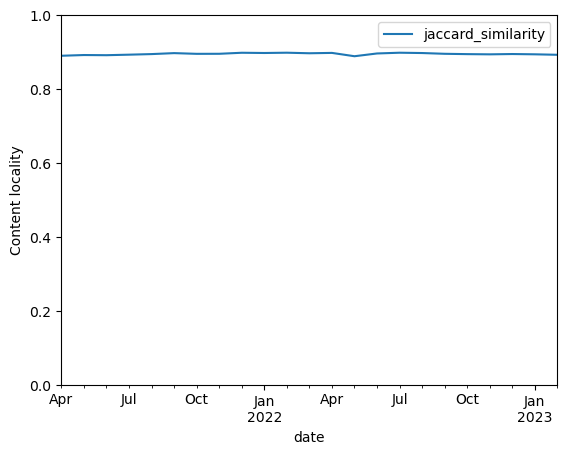

In [41]:
metric.plot(
    ylim=(0,1),
    ylabel="Content locality",
)